<a href="https://colab.research.google.com/github/ashishpatel26/tcn-keras-Examples/blob/master/TCN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the Libraries

In [1]:
!pip install keras-tcn

     |████████████████████████████████| 378kB 10.6MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from tcn import compiled_tcn

### Read the data

In [17]:
def data_generator():
    # input image dimensions
    img_rows, img_cols = 32, 32
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    x_train = x_train.reshape(-1, img_rows * img_cols, 3)
    x_test = x_test.reshape(-1, img_rows * img_cols, 3)

    num_classes = 10
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    y_train = np.expand_dims(y_train, axis=2)
    y_test = np.expand_dims(y_test, axis=2)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    return (x_train, y_train), (x_test, y_test)

### Load the data and Preprocess

In [31]:
(x_train, y_train), (x_test, y_test) = data_generator()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(50000, 1024, 3) (50000, 10) (10000, 1024, 3) (10000, 10)
(50000, 1024, 3) (50000, 10, 1) (10000, 1024, 3) (10000, 10, 1)
(50000, 1024, 3) (50000, 10, 1) (10000, 1024, 3) (10000, 10, 1)


### Design the TCN Model

In [32]:
model = compiled_tcn(return_sequences=False,
                         num_feat=3,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=x_train[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 20)
model.x = (None, 1024, 3)
model.y = (None, 10)


In [33]:
print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_train.shape = (50000, 1024, 3)
y_train.shape = (50000, 10, 1)
x_test.shape = (10000, 1024, 3)
y_test.shape = (10000, 10, 1)


In [34]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1024, 3)]         0         
_________________________________________________________________
tcn (TCN)                    (None, 20)                41600     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________


In [35]:
y_train = y_train.squeeze().argmax(axis=1)
y_test = y_test.squeeze().argmax(axis=1)

In [44]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test), workers=4, use_multiprocessing=True)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2417 - accuracy: 0.5578 - val_loss: 1.2150 - val_accuracy: 0.5705
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2315 - accuracy: 0.5613 - val_loss: 1.1823 - val_accuracy: 0.5748
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2149 - accuracy: 0.5678 - val_loss: 1.1692 - val_accuracy: 0.5806
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2134 - accuracy: 0.5640 - val_loss: 1.1709 - val_accuracy: 0.5806
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2040 - accuracy: 0.5703 - val_loss: 1.1602 - val_accuracy: 0.5885
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1979 - accuracy: 0.5723 - val_loss: 1.1538 - val_accuracy: 0.5899
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1951 - accuracy: 0.5720 - val_loss: 1.1529 -

In [45]:
result = model.evaluate(x_test, y_test)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

313/313 [==============================] - 2s 7ms/step - loss: 1.1287 - accuracy: 0.5938
Accuracy : 59.38 %
Loss : 112.87 %


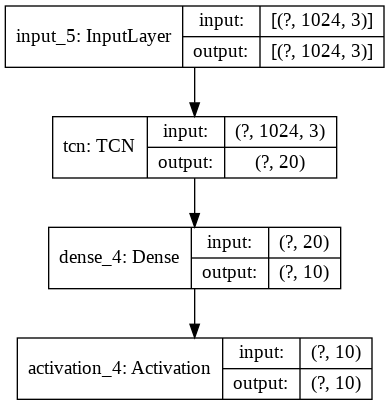

In [39]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

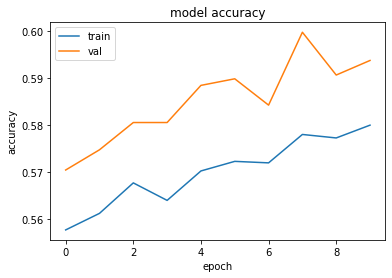

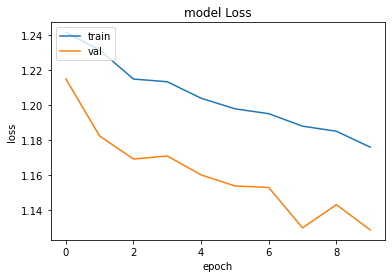

In [48]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Cohens kappa: 0.548667
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1000
           1       0.77      0.65      0.70      1000
           2       0.50      0.49      0.49      1000
           3       0.37      0.36      0.37      1000
           4       0.57      0.42      0.49      1000
           5       0.48      0.47      0.48      1000
           6       0.59      0.72      0.65      1000
           7       0.67      0.63      0.65      1000
           8       0.73      0.80      0.76      1000
           9       0.63      0.71      0.67      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



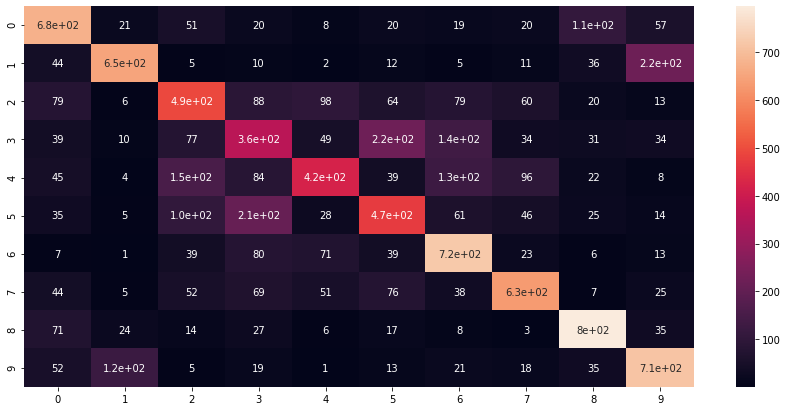

In [55]:
# predict probabilities for test set
yhat_probs = np.argmax(model.predict(x_test, verbose=0), axis=1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_probs)
print('Cohens kappa: %f' % kappa)
# ROC AUC
# auc = roc_auc_score(y_test, yhat_probs, multi_class = 'ovo')
# print('ROC AUC: %f' % auc)

print(classification_report(y_test, yhat_probs))
# confusion matrix
matrix = confusion_matrix(y_test, yhat_probs)
plt.figure(figsize = (15,7) )
sns.heatmap(matrix, annot=True)
plt.show()